# Import Libraries

In [455]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import re
%matplotlib inline

# Read Data

In [456]:
playStore = pd.read_csv('googleplaystore.csv')

In [457]:
playStore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [458]:
playStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [459]:
playStore.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


 - Feature Extraction

In [460]:
# Feature Extraction on Size => Size_kind + Size_value
playStore['Size_kind'] = playStore['Size'].apply(lambda x: x.split()[0][-1])
playStore['Size_value'] = playStore['Size'].apply(lambda x: x.split()[0][:-1])


In [461]:
# Remove Size column
playStore = playStore.drop('Size',axis=1)

In [462]:
# Feature Extraction on Android Version => version1 + version2
playStore['Android_Ver1'] = playStore['Android Ver'].apply(lambda x: re.split(r'\s*[-|and]\s*', x)[0] if isinstance(x, str)  else (x, None))
playStore['Android_Ver2'] = playStore['Android Ver'].apply(lambda x: re.split(r'\s*[-|and]\s*', x)[-1] if isinstance(x, str)  else (x, None))


In [463]:
# Remove Andriod Ver column
playStore = playStore.drop('Android Ver',axis=1)

# Handling Missing Data

 - Correct data types in columns

In [464]:
# remove '$' sign from Price before convert it to numeric 
playStore['Price'] = playStore['Price'].apply(lambda x: x.split()[0][1:])

In [465]:
# convert some columns to numeric
cols_to_convert_numeric = ['Size_value', 'Rating', 'Price', 'Reviews']
playStore[cols_to_convert_numeric] = playStore[cols_to_convert_numeric].apply(pd.to_numeric, errors='coerce')


In [466]:
playStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Installs        10841 non-null  object 
 5   Type            10840 non-null  object 
 6   Price           800 non-null    float64
 7   Content Rating  10840 non-null  object 
 8   Genres          10841 non-null  object 
 9   Last Updated    10841 non-null  object 
 10  Current Ver     10833 non-null  object 
 11  Size_kind       10841 non-null  object 
 12  Size_value      9145 non-null   float64
 13  Android_Ver1    10841 non-null  object 
 14  Android_Ver2    10841 non-null  object 
dtypes: float64(4), object(11)
memory usage: 1.2+ MB


 - Fill numeric columns

In [467]:
# fill Rating Columns with median
playStore['Rating'].fillna(playStore['Rating'].median(), inplace=True)

C:\Users\MR.GENIUS\AppData\Local\Temp\ipykernel_8732\1541953313.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  playStore['Rating'].fillna(playStore['Rating'].median(), inplace=True)


In [468]:
# fill Size_value column with median
playStore['Size_value'].fillna(playStore['Size_value'].median(), inplace=True)


C:\Users\MR.GENIUS\AppData\Local\Temp\ipykernel_8732\4224829320.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  playStore['Size_value'].fillna(playStore['Size_value'].median(), inplace=True)


In [469]:
# fill Price column with median
playStore['Price'].fillna(playStore['Price'].median(), inplace=True)


C:\Users\MR.GENIUS\AppData\Local\Temp\ipykernel_8732\3896551110.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  playStore['Price'].fillna(playStore['Price'].median(), inplace=True)


 - fill categorical columns

In [470]:
# fill Android_Ver1 column with mode
playStore['Android_Ver1'] = playStore['Android_Ver1'].fillna(playStore['Android_Ver1'].mode()[0])


In [471]:
# fill Type column with mode
playStore['Type'].fillna(playStore['Type'].mode()[0])


0        Free
1        Free
2        Free
3        Free
4        Free
         ... 
10836    Free
10837    Free
10838    Free
10839    Free
10840    Free
Name: Type, Length: 10841, dtype: object

In [472]:
# fill Current Ver column with mode
playStore['Current Ver'].fillna(playStore['Current Ver'].mode()[0], inplace=True)


C:\Users\MR.GENIUS\AppData\Local\Temp\ipykernel_8732\3933658742.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  playStore['Current Ver'].fillna(playStore['Current Ver'].mode()[0], inplace=True)


 - drop rows

In [473]:
# drop null values from Reviews and type columns
playStore = playStore.dropna(subset=['Reviews', 'Type'])


In [474]:
# to ensure there not null data
playStore.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Size_kind         0
Size_value        0
Android_Ver1      0
Android_Ver2      0
dtype: int64

# Handling Outliers

In [475]:
playStore.describe()

,Rating,Reviews,Price,Size_value
count,10839.000000,1.083900e+04,10839.000000,10839.000000
mean,4.206467,4.441939e+05,3.796778,33.591577
std,0.480363,2.927893e+06,15.790388,91.170412
min,1.000000,0.000000e+00,0.990000,1.000000
25%,4.100000,3.800000e+01,2.990000,6.800000
50%,4.300000,2.094000e+03,2.990000,15.000000
75%,4.500000,5.478300e+04,2.990000,28.000000
max,5.000000,7.815831e+07,400.000000,1020.000000


 - fix rating

In [476]:
playStore['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [477]:
playStore[playStore['Rating'] == 19]

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Size_kind,Size_value,Android_Ver1,Android_Ver2


In [478]:
# make the maximum of rating is 5
playStore.loc[playStore['Rating'] > 5, 'Rating'] = 5

 - fix price

In [479]:
playStore['Price'].unique()


array([  2.99,   4.99,   3.99,   6.99,   1.49,   7.99,   5.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,   2.49,
        10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,   3.95,
         4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,  17.99,
       400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,   1.59,
         6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,  18.99,
       389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99, 109.99,
       154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,   4.59,
        15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,   2.95,
         2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61, 394.99,
         1.26,   1.2 ,   1.04])

 - fix category

<Axes: xlabel='Category'>

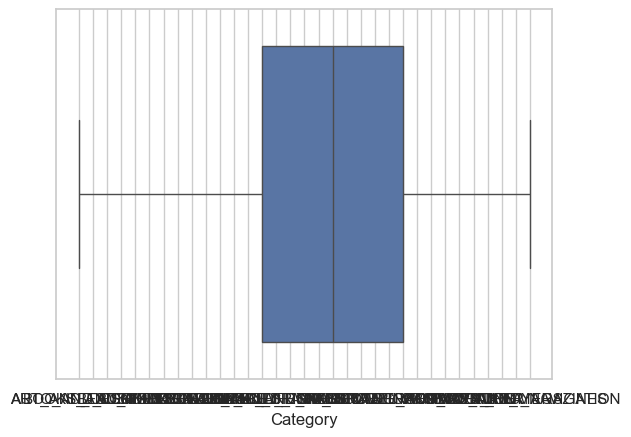

In [480]:
sns.boxplot(x = playStore['Category'])


In [481]:
playStore['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [482]:
# replace '1.9' with mode because it considerd null value
playStore[playStore['Category'] == '1.9'] = playStore['Category'].mode()[0]


 - fix Reviews

In [483]:
playStore['Reviews'].unique()


array([1.59000e+02, 9.67000e+02, 8.75100e+04, ..., 6.03000e+02,
       1.19500e+03, 3.98307e+05])

In [484]:
playStore['Reviews'].describe()


count    1.083900e+04
mean     4.441939e+05
std      2.927893e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.478300e+04
max      7.815831e+07
Name: Reviews, dtype: float64

 - fix installs

In [485]:
playStore['Installs'].unique()


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [486]:
# remove '+' operator for convert columns to numeric
playStore['Installs'] = playStore['Installs'].apply(
    lambda x: x if x.isdigit() or x.replace(',', '').replace('+', '').isdigit() else None
)

In [487]:
playStore['Installs'] =  playStore['Installs'].str.replace(',', '').str.replace('+', '').astype(float)


In [488]:
playStore['Installs'].fillna(playStore['Installs'].mean(), inplace=True)


C:\Users\MR.GENIUS\AppData\Local\Temp\ipykernel_8732\3539288517.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  playStore['Installs'].fillna(playStore['Installs'].mean(), inplace=True)


In [489]:
playStore['Installs'].unique()


array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

 - fix Android Ver

In [490]:
playStore['Android_Ver1'].unique()


array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3', 'V',
       '2.2', '5.0', '6.0', '1.6', '1.5', '2.1', '7.0', '5.1', '4.3',
       '2.0', '3.2', '4.4W', '7.1', '8.0', '3.1', '2.0.1', (nan, None),
       '1.0'], dtype=object)

In [491]:
# remove any value dont start with digit
playStore['Android_Ver1'] = playStore['Android_Ver1'].apply(
    lambda x: x if isinstance(x, str) and x.replace('.', '').isdigit() else None
)

In [501]:
playStore['Android_Ver1'] = playStore['Android_Ver1'].fillna(playStore['Android_Ver1'].mode()[0])

In [502]:
playStore['Android_Ver1'].unique()


array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3', '2.2',
       '5.0', '6.0', '1.6', '1.5', '2.1', '7.0', '5.1', '4.3', '2.0',
       '3.2', '7.1', '8.0', '3.1', '2.0.1', '1.0'], dtype=object)

In [503]:
playStore['Android_Ver2'].unique()


array(['up', '.', '7.1.1', '8.0', '6.0'], dtype=object)

In [493]:
#remove nan, 'evice'
playStore['Android_Ver2'] = playStore['Android_Ver2'].apply(
    lambda x: x if x in ['up', '7.1.1', '8.0', '6.0'] else '.'
)

In [495]:
playStore['Android_Ver2'].unique()


array(['up', '.', '7.1.1', '8.0', '6.0'], dtype=object)

In [494]:
playStore.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Size_kind,Size_value,Android_Ver1,Android_Ver2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,10000.0,Free,2.99,Everyone,Art & Design,"January 7, 2018",1.0.0,M,19.0,4.0.3,up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,500000.0,Free,2.99,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,M,14.0,4.0.3,up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,5000000.0,Free,2.99,Everyone,Art & Design,"August 1, 2018",1.2.4,M,8.7,4.0.3,up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,50000000.0,Free,2.99,Teen,Art & Design,"June 8, 2018",Varies with device,M,25.0,4.2,up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,100000.0,Free,2.99,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,M,2.8,4.4,up


In [504]:
playStore.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Size_kind         0
Size_value        0
Android_Ver1      0
Android_Ver2      0
dtype: int64

In [505]:
playStore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10839 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          10839 non-null  float64
 3   Reviews         10839 non-null  float64
 4   Installs        10839 non-null  float64
 5   Type            10839 non-null  object 
 6   Price           10839 non-null  float64
 7   Content Rating  10839 non-null  object 
 8   Genres          10839 non-null  object 
 9   Last Updated    10839 non-null  object 
 10  Current Ver     10839 non-null  object 
 11  Size_kind       10839 non-null  object 
 12  Size_value      10839 non-null  float64
 13  Android_Ver1    10839 non-null  object 
 14  Android_Ver2    10839 non-null  object 
dtypes: float64(5), object(10)
memory usage: 1.3+ MB


In [506]:
playStore.describe()

,Rating,Reviews,Installs,Price,Size_value
count,10839.000000,1.083900e+04,1.083900e+04,10839.000000,10839.000000
mean,4.206467,4.441939e+05,1.546577e+07,3.796778,33.591577
std,0.480363,2.927893e+06,8.503315e+07,15.790388,91.170412
min,1.000000,0.000000e+00,0.000000e+00,0.990000,1.000000
25%,4.100000,3.800000e+01,3.000000e+03,2.990000,6.800000
50%,4.300000,2.094000e+03,1.000000e+05,2.990000,15.000000
75%,4.500000,5.478300e+04,5.000000e+06,2.990000,28.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,1020.000000


In [507]:
playStore.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Size_kind,Size_value,Android_Ver1,Android_Ver2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,10000.0,Free,2.99,Everyone,Art & Design,"January 7, 2018",1.0.0,M,19.0,4.0.3,up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,500000.0,Free,2.99,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,M,14.0,4.0.3,up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,5000000.0,Free,2.99,Everyone,Art & Design,"August 1, 2018",1.2.4,M,8.7,4.0.3,up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,50000000.0,Free,2.99,Teen,Art & Design,"June 8, 2018",Varies with device,M,25.0,4.2,up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,100000.0,Free,2.99,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,M,2.8,4.4,up


# Analytical Questions

In [513]:
# 1) What is the most expensive app on the PlayStore?
print("the most expensive app on the PlayStore: ", playStore['Price'].max())

the most expensive app on the PlayStore:  400.0


In [514]:
# 2) Which genre has the highest number of apps?
top_genre = playStore['Genres'].value_counts().idxmax()
print("Genre of the highest number of apps: ", top_genre)

Genre of the highest number of apps:  Tools


In [515]:
# 3) What is the average size of free vs.paid apps?
sizeFree = playStore[playStore['Type'] == 'Free']
sizePaid = playStore[playStore['Type'] == 'Paid']

print(f"Average size of free apps: {sizeFree['Size_value'].mean():.2f}")
print(f"Average size of paid apps: {sizePaid['Size_value'].mean():.2f}")


Average size of free apps: 31.92
Average size of paid apps: 54.62


In [516]:
# 4) What are the top 5 most expensive apps with a perfect rating?
playStore.groupby('Rating')['Price'].max().sort_values(ascending=False).head(5)


Rating
3.6    400.00
3.8    399.99
4.1    399.99
4.4    399.99
4.3    399.99
Name: Price, dtype: float64

In [517]:
# 5) How many apps have received more than 50K reviews?
filterReviews = playStore[playStore['Reviews'] >= 50000]
print("Apps have received more than 50K reviews: ", len(filterReviews['App']))

Apps have received more than 50K reviews:  2782


In [518]:
# 6) What is the average price of apps, grouped by genre and number of installs?

average_prices = playStore.groupby(['Genres', 'Installs'])['Price'].mean().reset_index()
# Sort values from max to min
print(average_prices.sort_values(by='Price', ascending=False).head(10))


            Genres  Installs       Price
503      Lifestyle       0.0  399.990000
426        Finance       0.0  212.990000
538        Medical       0.0  200.000000
638   Productivity       0.0  154.990000
414         Events       1.0  109.990000
433        Finance    5000.0   39.080909
432        Finance    1000.0   32.765000
512      Lifestyle   10000.0   29.709756
435        Finance   50000.0   25.045556
387  Entertainment    5000.0   16.173333


In [520]:
# 7) How many apps have a rating higher than 4.7, and what is their average price? 
# Filter rating then get apps 
print("Number of apps rated higher than 4.7: ",len(playStore[playStore['Rating'] > 4.7]['App']))
print("Average price: ",playStore[playStore['Rating'] > 4.7]['Price'].mean())


Number of apps rated higher than 4.7:  595
Average price:  3.125008403361345


In [522]:
# 8) What is Google's estimated revenue from apps with 5,000,000+ installs?
# Filter Installs then get Price 
price = playStore[playStore['Installs'] == 5000000]['Price']
print("Google's estimated revenue from apps with more than 5,000,000 installs: ", (price * 0.3).sum())


Google's estimated revenue from apps with more than 5,000,000 installs:  674.5440000000001


In [523]:
# 9) What are the maximum and minimum sizes of free vs. paid apps? 
filterFree = playStore[playStore['Type'] == 'Free']['Size_value']
minimumSizeFree = filterFree.min()
maxmumSizeFree = filterFree.max()
print(f"Minimum Size for Free: {minimumSizeFree}, Maximum Size for Free: {maxmumSizeFree}")

filterPaid = playStore[playStore['Type'] == 'Paid']['Size_value']
minimumSizePaid = filterPaid.min()
maxmumSizePaid = filterPaid.max()
print(f"Minimum Size for Paid: {minimumSizePaid}, Maximum Size for Paid: {maxmumSizePaid}")


Minimum Size for Free: 1.0, Maximum Size for Free: 994.0
Minimum Size for Paid: 1.0, Maximum Size for Paid: 1020.0


<Axes: >

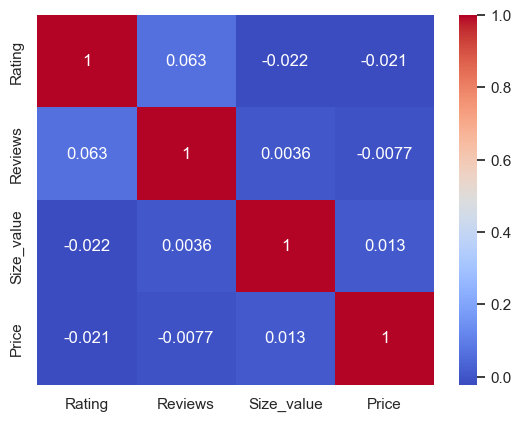

In [524]:
# 10) Is there a correlation between an app’s rating, number of reviews, size, and its price? 
correlation_matrix = playStore[['Rating', 'Reviews', 'Size_value', 'Price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")


In [525]:
# 11) How many apps exist for each type (free/paid) across diﬀerent content ratings?
countsType = playStore.groupby(['Content Rating', 'Type']).size().reset_index(name='Count')
countsType


,Content Rating,Type,Count
0,Adults only 18+,Free,3
1,Everyone,Free,8019
2,Everyone,Paid,695
3,Everyone 10+,Free,380
4,Everyone 10+,Paid,33
5,Mature 17+,Free,479
6,Mature 17+,Paid,20
7,Teen,Free,1156
8,Teen,Paid,52
9,Unrated,Free,2


In [527]:
# 12) How many apps are compatible with Android version 4.x?
print("Number of apps are compatible with Android version 4.x: ", len(playStore[playStore['Android_Ver1'].apply(lambda x: x.startswith('4.'))]))



Number of apps are compatible with Android version 4.x:  8322
